In [1]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np


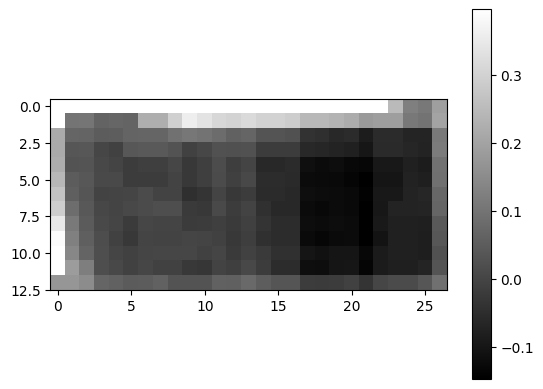

Image shape: (13, 27)
Number of bands: 1
Width: 27
Height: 13


In [2]:

# Open the TIFF file
with rasterio.open('NDMI_2019-03-12_to_2019-03-19.tif') as src:
    # Read the data
    image = src.read()
    
    # If it's a single band image
    if src.count == 1:
        # Read the first band
        image = src.read(1)
        
        # Display the image
        plt.imshow(image, cmap='gray')
        plt.colorbar()
        plt.show()
        
    # If it's a multi-band image (e.g., RGB)
    elif src.count == 3:
        # Read all bands and transpose to correct shape for plotting
        image = np.transpose(image, (1, 2, 0))
        
        # Display the image
        plt.imshow(image)
        plt.colorbar()
        plt.show()
    
    # Print basic metadata
    print(f"Image shape: {image.shape}")
    print(f"Number of bands: {src.count}")
    print(f"Width: {src.width}")
    print(f"Height: {src.height}")

27

In [3]:
image

array([[            nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,  2.47457281e-01,
         1.22839250e-01,  1.09025486e-01,  1.91108286e-01],
       [            nan,  9.94853675e-02,  1.02075092e-01,
         6.33626282e-02,  6.94016814e-02,  6.62431344e-02,
         2.23629400e-01,  2.23629400e-01,  2.94809371e-01,
         3.58545989e-01,  3.37805957e-01,  3.09480041e-01,
         3.04396749e-01,  3.17341626e-01,  3.00173670e-01,
         3.00173670e-01,  2.88127720e-01,  2.43103087e-01,
         2.43381709e-01,  2.36619845e-01,  2.18485832e-01,
         1.81136742e-01,  1.88359395e-01,  1.88359395e-

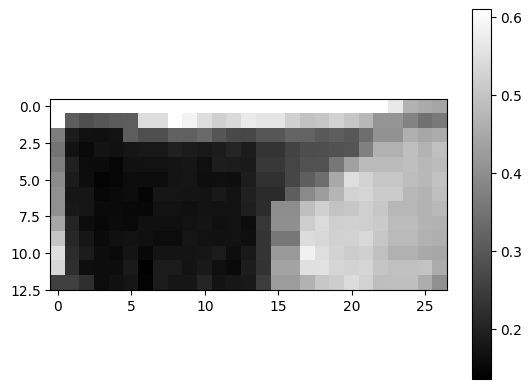

Image shape: (13, 27)
Number of bands: 1
Width: 27
Height: 13


In [13]:
with rasterio.open('data/NDVI_Weekly_Exports/NDVI_Weekly_Exports_2019_2024/NDVI_2019-01-15_to_2019-01-22.tif') as src:  # NDMI_2019-03-19_to_2019-03-26.tif
    # Read the data
    image = src.read()
    
    # If it's a single band image
    if src.count == 1:
        # Read the first band
        image = src.read(1)
        
        # Display the image
        plt.imshow(image, cmap='gray')
        plt.colorbar()
        plt.show()
        
    # If it's a multi-band image (e.g., RGB)
    elif src.count == 3:
        # Read all bands and transpose to correct shape for plotting
        image = np.transpose(image, (1, 2, 0))
        
        # Display the image
        plt.imshow(image)
        plt.colorbar()
        plt.show()
    
    # Print basic metadata
    print(f"Image shape: {image.shape}")
    print(f"Number of bands: {src.count}")
    print(f"Width: {src.width}")
    print(f"Height: {src.height}")

In [14]:
image

array([[       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan, 0.56872565, 0.46689114,
        0.45096952, 0.4426141 ],
       [       nan, 0.30797675, 0.28341955, 0.29568845, 0.3045429 ,
        0.30947137, 0.546922  , 0.546922  , 0.61021364, 0.58664113,
        0.5481728 , 0.52278376, 0.5392377 , 0.569662  , 0.56131077,
        0.56131077, 0.5224327 , 0.49667898, 0.5032004 , 0.5257326 ,
        0.50372946, 0.47830325, 0.41304928, 0.41304928, 0.37900552,
        0.34727123, 0.36168084],
       [0.36823735, 0.18719068, 0.167713  , 0.16676629, 0.16901831,
        0.30947137, 0.28141224, 0.28141224, 0.31604025, 0.3148358 ,
        0.33256617, 0.2931818 , 0.27354765, 0.2683461 , 0.29603255,
        0.29603255, 0.32189974, 0.31940556, 0.3005

In [15]:
max_value = max(max(x for x in row if not np.isnan(x)) for row in image)
print(max_value)

0.61021364


Image shape: (13, 27)
Data type: float32


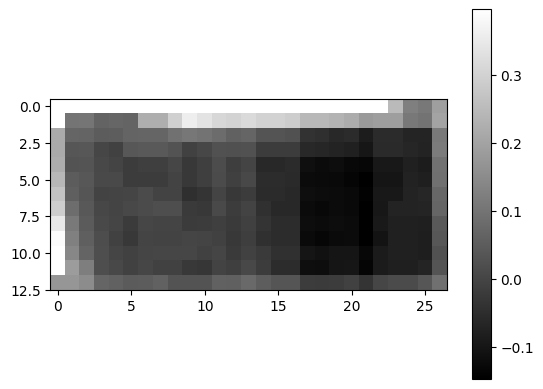

Number of pages: 1


In [1]:
import tifffile
import matplotlib.pyplot as plt
import numpy as np

# Read the TIFF image
img = tifffile.imread('NDMI_2019-03-12_to_2019-03-19.tif')

# Print basic information
print(f"Image shape: {img.shape}")
print(f"Data type: {img.dtype}")

# Display the image based on dimensionality
if len(img.shape) == 2:  # Single channel/grayscale
    plt.imshow(img, cmap='gray')
    plt.colorbar()
    plt.show()

elif len(img.shape) == 3:  # Multi-channel (like RGB)
    if img.shape[2] == 3:  # RGB image
        plt.imshow(img)
    else:  # Multiple z-slices or time series
        # Show first slice/frame
        plt.imshow(img[0], cmap='gray')
    plt.colorbar()
    plt.show()

# To save a TIFF image
tifffile.imwrite('output.tiff', img)

# For multi-page TIFF, you can read specific pages
with tifffile.TiffFile('NDMI_2019-03-12_to_2019-03-19.tif') as tif:
    # Print number of pages
    print(f"Number of pages: {len(tif.pages)}")
    
    # Read specific page (e.g., first page)
    page = tif.pages[0]
    page_img = page.asarray()